In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('renfe.csv')

In [3]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [4]:
df.tail()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
2579766,2579766,2019-04-19 05:31:38,MADRID,SEVILLA,2019-05-30 19:00:00,2019-05-30 21:38:00,AVE,76.30,Turista,Flexible
2579767,2579767,2019-04-19 05:31:38,MADRID,SEVILLA,2019-05-30 19:30:00,2019-05-30 22:05:00,AVE,76.30,Turista,Flexible
2579768,2579768,2019-04-19 05:31:38,MADRID,SEVILLA,2019-05-30 20:00:00,2019-05-30 22:21:00,AVE,72.30,Turista Plus,Promo
2579769,2579769,2019-04-19 05:31:38,MADRID,SEVILLA,2019-05-30 20:35:00,2019-05-30 23:15:00,AVE,76.30,Turista,Flexible
2579770,2579770,2019-04-19 05:31:38,MADRID,SEVILLA,2019-05-30 21:25:00,2019-05-31 00:10:00,AV City,49.15,Turista,Promo


In [5]:
df.shape

(2579771, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 10 columns):
Unnamed: 0     int64
insert_date    object
origin         object
destination    object
start_date     object
end_date       object
train_type     object
price          float64
train_class    object
fare           object
dtypes: float64(1), int64(1), object(8)
memory usage: 196.8+ MB


In [7]:
df.dtypes

Unnamed: 0       int64
insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [8]:
df.columns

Index(['Unnamed: 0', 'insert_date', 'origin', 'destination', 'start_date',
       'end_date', 'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

In [9]:
dff=df.drop('Unnamed: 0',axis=1)

In [10]:
dff.price.describe()

count    2.269090e+06
mean     6.338550e+01
std      2.578319e+01
min      1.545000e+01
25%      4.375000e+01
50%      6.030000e+01
75%      7.880000e+01
max      2.142000e+02
Name: price, dtype: float64

In [11]:
dff.isnull().sum()

insert_date         0
origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

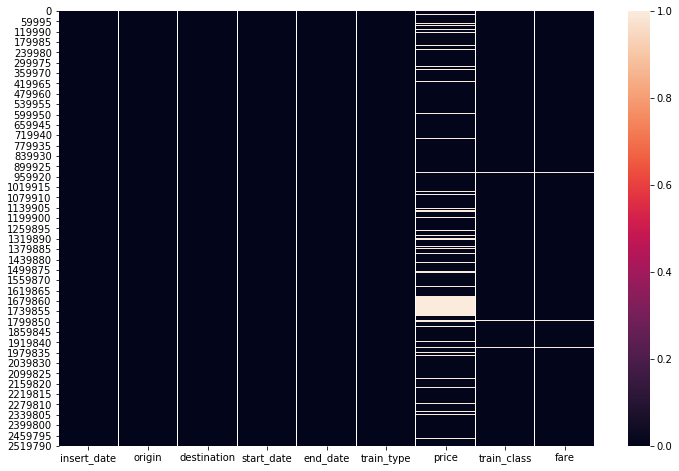

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(dff.isnull())

In [13]:
dff.duplicated().sum()

3516

In [14]:
# Exploratory Data Analysis

In [15]:
dff.price.fillna(dff.price.mean(),inplace=True)

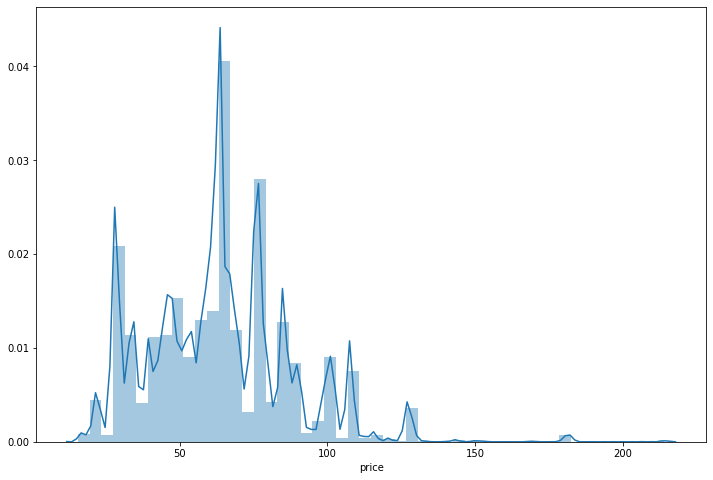

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(dff.price)

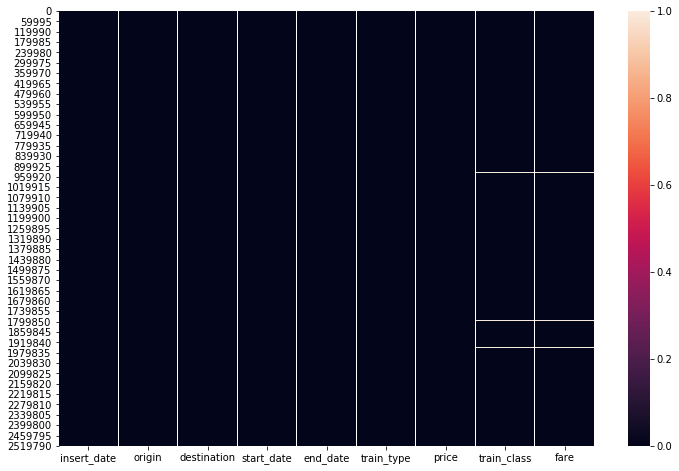

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(dff.isnull())

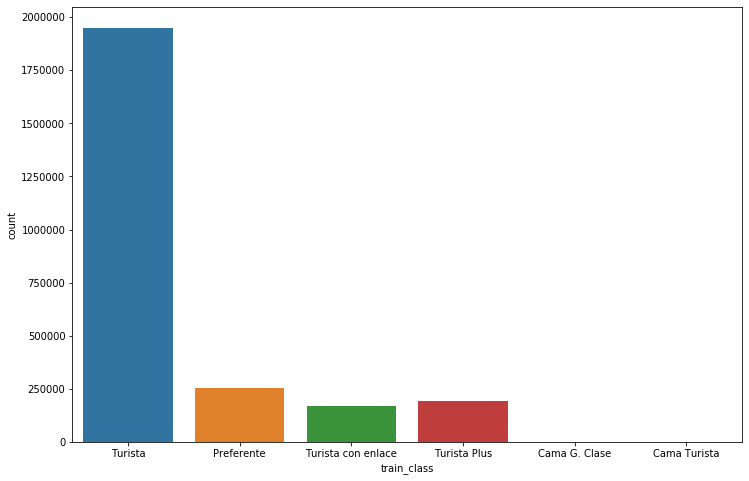

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(dff.train_class)

In [19]:
dff.train_class.fillna('Turista',inplace=True)

In [20]:
dff.fare.fillna('Promo',inplace=True)

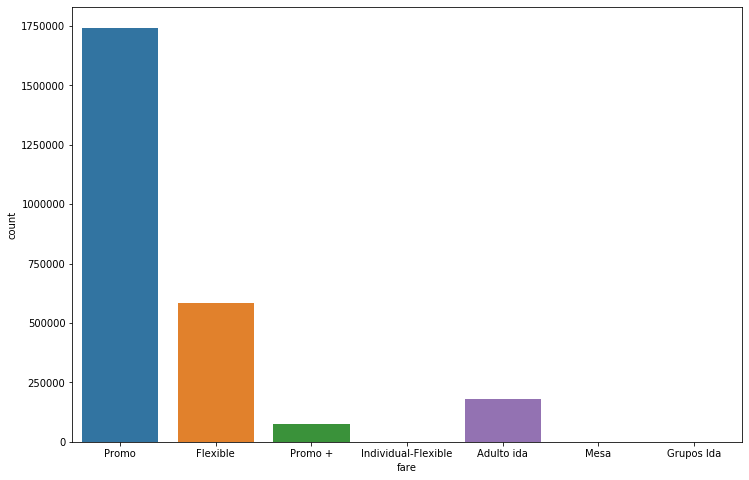

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(dff.fare)

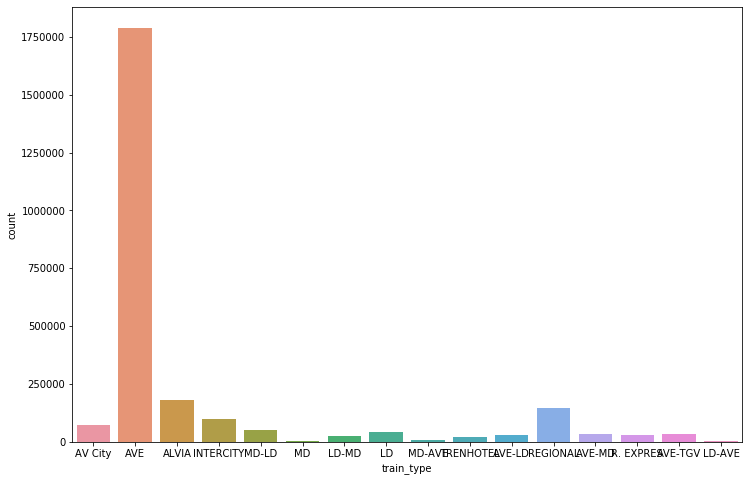

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(dff.train_type)

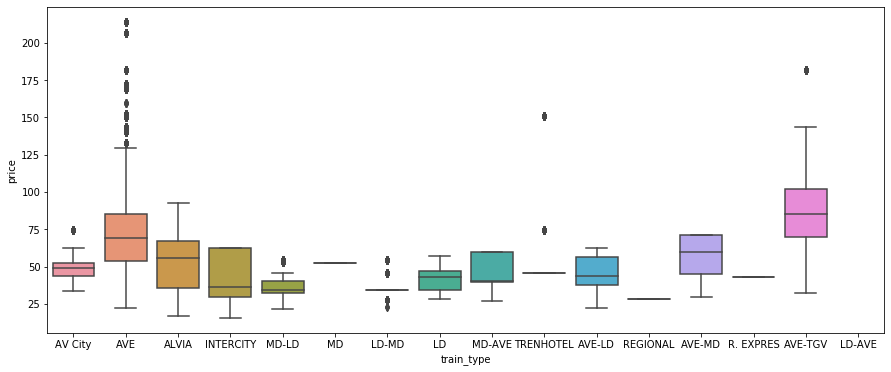

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(dff.train_type,df.price)

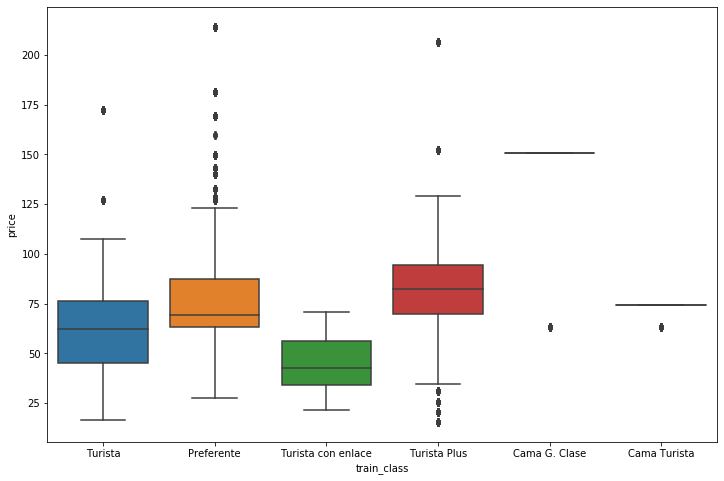

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(dff.train_class,dff.price)

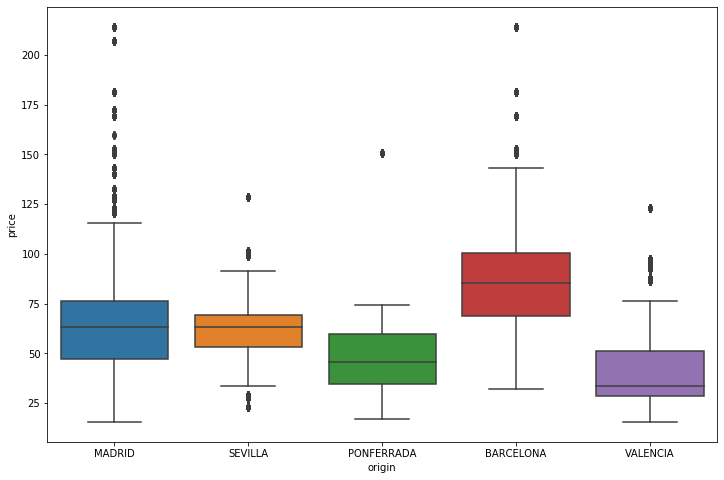

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(dff.origin,dff.price)

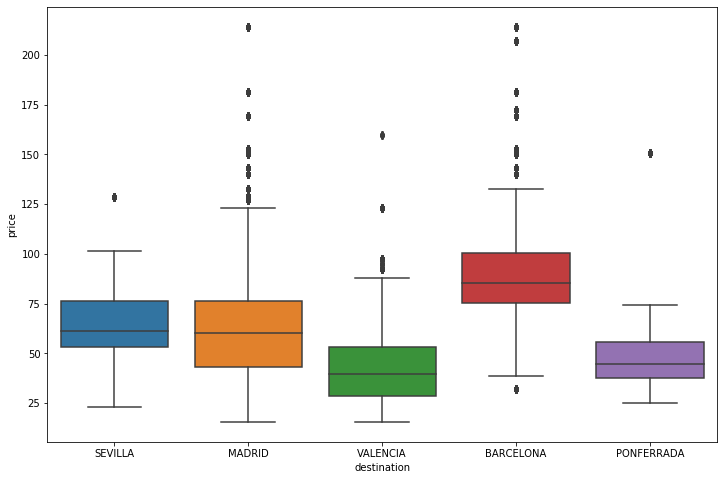

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(dff.destination,df.price)

In [27]:
dff.drop('insert_date',axis=1,inplace=True)

In [28]:
# we want to calculate the time between the place of origin  and destination

In [29]:
import datetime 

In [30]:
start = dff['start_date'].values
end = dff['end_date'].values
datetimeFormat = '%Y-%m-%d %H:%M:%S'
duration = []
for i in range(len(start)):
    diff = datetime.datetime.strptime(end[i], datetimeFormat)- datetime.datetime.strptime(start[i], datetimeFormat)
    duration.append(diff.seconds)
dff['duration'] = duration

In [31]:
dff

,origin,destination,start_date,end_date,train_type,price,train_class,fare,duration
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo,10560
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo,9120
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo,8460
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo,9120
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo,9840
...,...,...,...,...,...,...,...,...,...
2579766,MADRID,SEVILLA,2019-05-30 19:00:00,2019-05-30 21:38:00,AVE,76.300000,Turista,Flexible,9480
2579767,MADRID,SEVILLA,2019-05-30 19:30:00,2019-05-30 22:05:00,AVE,76.300000,Turista,Flexible,9300
2579768,MADRID,SEVILLA,2019-05-30 20:00:00,2019-05-30 22:21:00,AVE,72.300000,Turista Plus,Promo,8460
2579769,MADRID,SEVILLA,2019-05-30 20:35:00,2019-05-30 23:15:00,AVE,76.300000,Turista,Flexible,9600


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
cat_cols=['origin','destination','train_type','train_class','fare']
for x in cat_cols:
    dff[x]=le.fit_transform(dff[x])
dff.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare,duration
0,1,3,2019-05-29 06:20:00,2019-05-29 09:16:00,1,38.550000,3,5,10560
1,1,3,2019-05-29 07:00:00,2019-05-29 09:32:00,2,53.400000,3,5,9120
2,1,3,2019-05-29 07:30:00,2019-05-29 09:51:00,2,47.300000,3,5,8460
3,1,3,2019-05-29 08:00:00,2019-05-29 10:32:00,2,69.400000,2,5,9120
4,1,3,2019-05-29 08:30:00,2019-05-29 11:14:00,0,63.385503,3,5,9840


In [34]:
dff.drop(['start_date','end_date'],axis=1,inplace=True)

In [35]:
dff.head()

,origin,destination,train_type,price,train_class,fare,duration
0,1,3,1,38.550000,3,5,10560
1,1,3,2,53.400000,3,5,9120
2,1,3,2,47.300000,3,5,8460
3,1,3,2,69.400000,2,5,9120
4,1,3,0,63.385503,3,5,9840


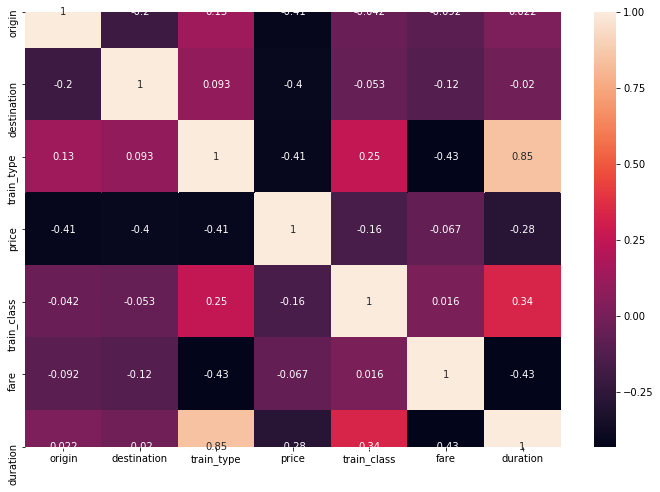

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(dff.corr(),annot=True)

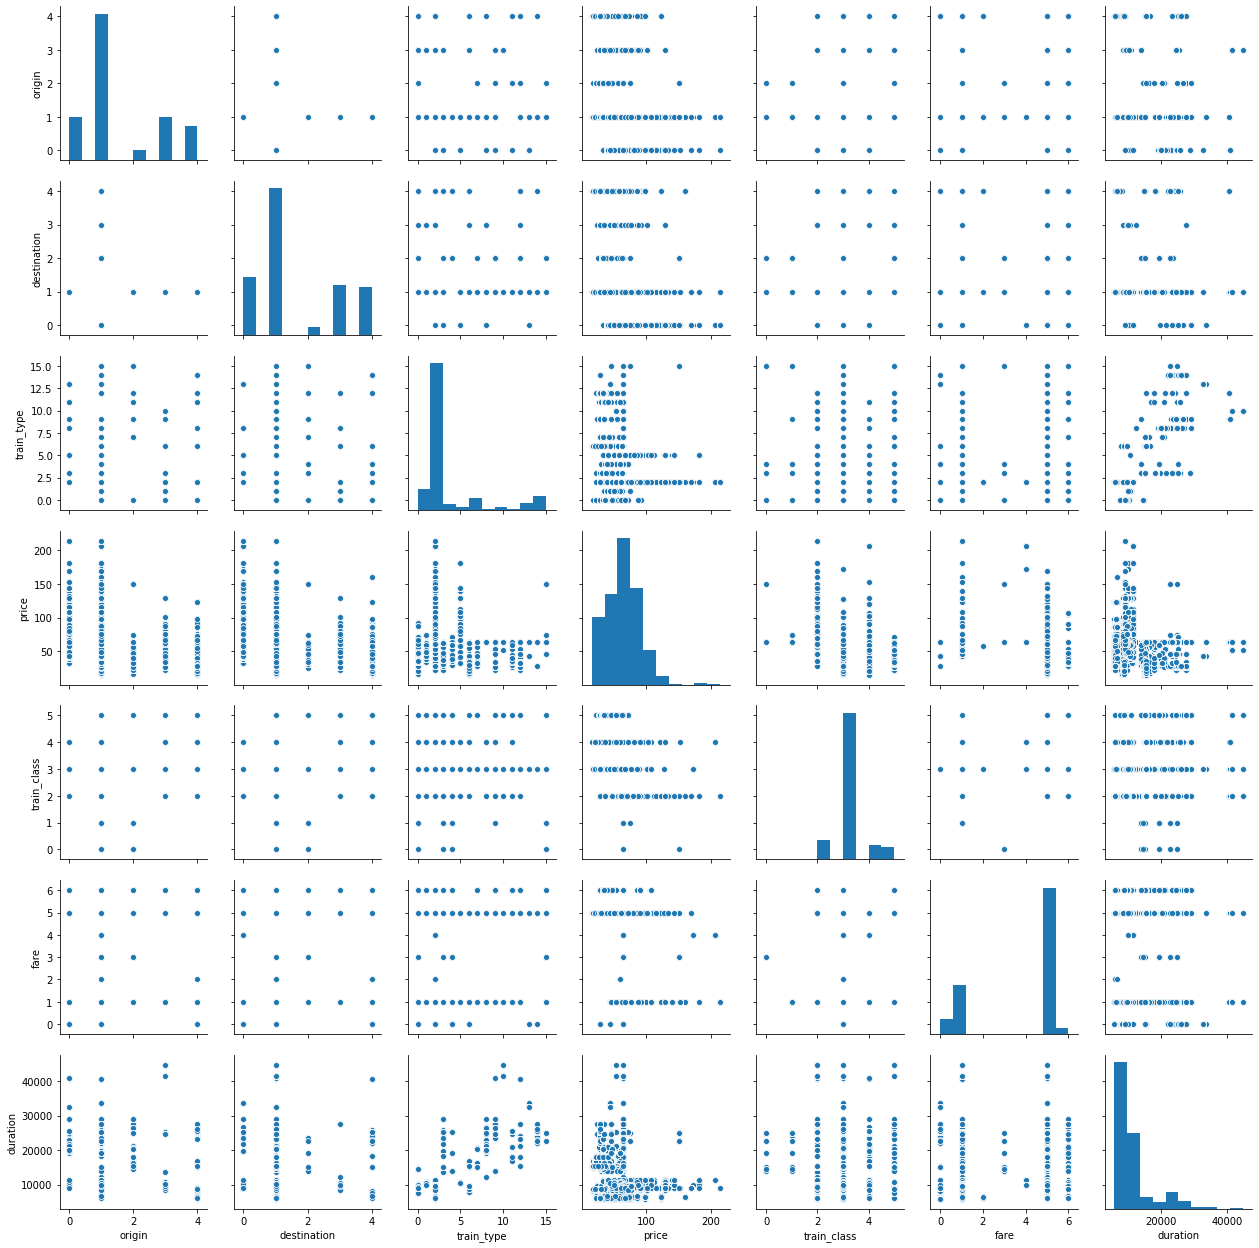

In [37]:
sns.pairplot(dff)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dt=pd.DataFrame(dff,columns=dff.columns)
dt.head()

,origin,destination,train_type,price,train_class,fare,duration
0,1,3,1,38.550000,3,5,10560
1,1,3,2,53.400000,3,5,9120
2,1,3,2,47.300000,3,5,8460
3,1,3,2,69.400000,2,5,9120
4,1,3,0,63.385503,3,5,9840


In [39]:
y=dt.price
x=dt.drop('price',axis=1)
y.shape,x.shape

((2579771,), (2579771, 6))

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)


In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
# LASSO REGRESSION

In [43]:
lso=Lasso()
lso.fit(x_train,y_train)
pred=lso.predict(x_test)

In [44]:
print('R-Squared:', r2_score(y_test,pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred)))

R-Squared: 0.6200977460019295
RMSE:  14.91199336931652


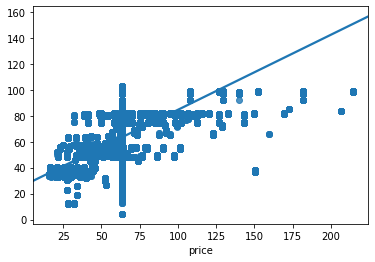

In [45]:
sns.regplot(y_test,pred)

In [46]:
# Ridge Regresssion

In [47]:
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train,y_train)
rgpred=rg.predict(x_test)

In [48]:
print('R-squared: ',r2_score(y_test,rgpred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,rgpred)))

R-squared:  0.628130059119874
RMSE:  14.753508258804814


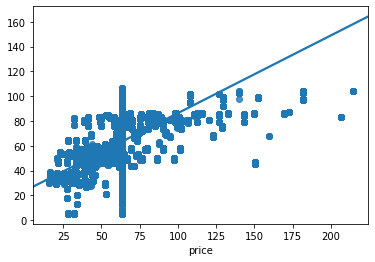

In [49]:
sns.regplot(y_test,rgpred)

In [50]:
# ElasticNet Regression 
from sklearn.linear_model import ElasticNet
elnt=ElasticNet()
elnt.fit(x_train,y_train)
elntpred=elnt.predict(x_test)

In [51]:
print('R-squared: ',r2_score(y_test,elntpred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,elntpred)))


R-squared:  0.5818517366646212
RMSE:  15.644616276929536


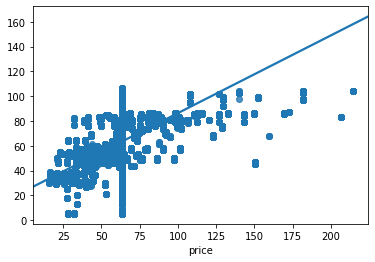

In [52]:
sns.regplot(y_test,rgpred)

In [53]:
#Bayesian Regresssion

In [54]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(x_train,y_train)
brpred=br.predict(x_test)

In [55]:
print('R-squared: ',r2_score(y_test,brpred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,brpred)))

R-squared:  0.6281300554573537
RMSE:  14.753508331457935
